# Quest - Fill missing values & Merge

## Execute the code below

In [97]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [98]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


Now, complete the following tasks :
Let's go in the deep !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name). 

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge. 

In [99]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [100]:
# Checking the "length" of both dataframes
print(df_main.size)
print(df_opinion.size)

5475
2046


This is wrong, the `size` property returns number of rows x columns if the object is a DataFrame.

We should better use the `shape` property

In [101]:
# Checking the "shape" of both dataframes
print(df_main.shape)
print(df_opinion.shape)

(365, 15)
(341, 6)


Obviously we have:
 * 365 day measurements in `df_main` DataFrame
 * and only 341 measurements in `df_opinion` DataFrame

 
 They have different number of rows, so we better use _LEFT JOIN_ to merge them.

In [102]:
# Your code here :
df2018 = pd.merge(
    left = df_main,
    right = df_opinion,
    left_on='DATE',
    right_on='date',
    how='left'
)

# Check the shape of the newly joint dataframe
print(df2018.shape)

(365, 21)


### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:** 
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [103]:
# You should now probably drop the "date" column. 
# This column is incomplete, it were provided from the opinion file. 
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored


In [104]:
# Printing out new shape
print(df2018.shape)

(365, 20)


Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [105]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df2018.info())


My DataFrame shape is :  (365, 20)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEW

### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

In [106]:
# Your code here :
print(df2018[df2018["OPINION"].isna()])

           DATE  MAX_TEMPERATURE_C  ...  SUNHOUR  OPINION
18   2018-01-19                 10  ...      NaN      NaN
31   2018-02-01                  8  ...      NaN      NaN
66   2018-03-08                 13  ...      NaN      NaN
100  2018-04-11                 15  ...      NaN      NaN
118  2018-04-29                 10  ...      NaN      NaN
143  2018-05-24                 23  ...      NaN      NaN
152  2018-06-02                 23  ...      NaN      NaN
163  2018-06-13                 20  ...      NaN      NaN
165  2018-06-15                 19  ...      NaN      NaN
175  2018-06-25                 25  ...      NaN      NaN
184  2018-07-04                 25  ...      NaN      NaN
191  2018-07-11                 23  ...      NaN      NaN
194  2018-07-14                 28  ...      NaN      NaN
197  2018-07-17                 23  ...      NaN      NaN
204  2018-07-24                 29  ...      NaN      NaN
220  2018-08-09                 20  ...      NaN      NaN
225  2018-08-1

## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [107]:
# Just execute the code below :
df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

False    341
True      24
Name: flag, dtype: int64

## 3 - Visualize and Fill the NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

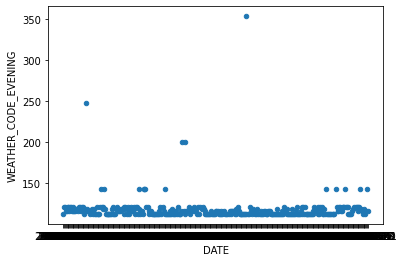

In [108]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis
df2018.plot.scatter(
    "DATE",
    "WEATHER_CODE_EVENING"
)

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

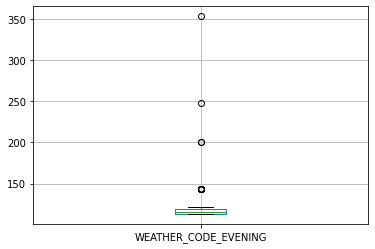

In [109]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING
df2018.boxplot("WEATHER_CODE_EVENING")

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [110]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop

# I used list comprehension to create a list:
# [q/10 for q in range(11)] = [0.0, 0.1, 0.2, ..., 1.0]
# ... and used it in df.quantile() method

# Note that:
#   decile 0 = min
#   decile 10 = max
df2018[["WEATHER_CODE_EVENING"]].quantile([q/10 for q in range(11)])



,WEATHER_CODE_EVENING
0.0,113.0
0.1,113.0
0.2,113.0
0.3,113.0
0.4,113.0
0.5,116.0
0.6,116.0
0.7,119.0
0.8,122.0
0.9,122.0


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method 

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [111]:
# Computing actually both (why not)
mean_weather_column = df2018["WEATHER_CODE_EVENING"].mean()
median_weather_column = df2018["WEATHER_CODE_EVENING"].median()

# Filling missing values with MEDIAN = 116.0 (my choice)
# Print out counts of different values (note there's no 116.0 (median))
print(df2018[["WEATHER_CODE_EVENING", "flag"]].value_counts())

# Fill in and re-count
# There are 24 new values of 116.0
print(df2018[["WEATHER_CODE_EVENING", "flag"]].fillna(median_weather_column).value_counts())

# Now inplace = True to make it permanent
df2018["WEATHER_CODE_EVENING"].fillna(median_weather_column, inplace=True)

# Display new counts
df2018['WEATHER_CODE_EVENING'].value_counts()

WEATHER_CODE_EVENING  flag 
113.0                 False    154
116.0                 False     78
122.0                 False     59
119.0                 False     34
143.0                 False     12
200.0                 False      2
353.0                 False      1
248.0                 False      1
dtype: int64
WEATHER_CODE_EVENING  flag 
113.0                 False    154
116.0                 False     78
122.0                 False     59
119.0                 False     34
116.0                 True      24
143.0                 False     12
200.0                 False      2
353.0                 False      1
248.0                 False      1
dtype: int64


113.0    154
116.0    102
122.0     59
119.0     34
143.0     12
200.0      2
353.0      1
248.0      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [112]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

In [113]:
# First I'd like to know how many empty values are there for both columns
print(df2018[["TOTAL_SNOW_MM", "UV_INDEX"]].isna().sum())

# Of course, it's 24 for both of them

#Let's get the deciles (I liked that approach)
print(df2018[["TOTAL_SNOW_MM", "UV_INDEX"]].quantile([q/10 for q in range(11)]))

# Seems like TOTAL_SNOW_MM is 0, let's check that
print(df2018["TOTAL_SNOW_MM"].value_counts())

# Yeah, just as I thought. So we'll fill NaNs with 0 there.
print(df2018[["TOTAL_SNOW_MM", "flag"]].fillna(0).value_counts())

# My assumption is that UV_INDEX is the aggregate function over each day of year.
# UV index is related to sun elevation among other factor as well.
# So it makes sense to expect similar index values in particular season of year.
# Therefore I choose to use "pad" method to fill the NaNs
print(df2018[["UV_INDEX", "flag"]].fillna(method="pad").value_counts())

# Output:
# UV_INDEX  flag 
# 1.0       False    260
# 3.0       False     30
# 4.0       False     26
# 1.0       True      22
# 2.0       False     14
# 5.0       False     11
# 4.0       True       1
# 3.0       True       1
# dtype: int64

# So it seems we will be putting 22x 1.0, then one 3.0 and one 4.0

# Fill it in
df2018["TOTAL_SNOW_MM"].fillna(0, inplace=True)
df2018["UV_INDEX"].fillna(method="pad", inplace=True)

# Check via deciles
print(df2018[["TOTAL_SNOW_MM", "UV_INDEX"]].quantile([q/10 for q in range(11)]))


TOTAL_SNOW_MM    24
UV_INDEX         24
dtype: int64
     TOTAL_SNOW_MM  UV_INDEX
0.0            0.0       1.0
0.1            0.0       1.0
0.2            0.0       1.0
0.3            0.0       1.0
0.4            0.0       1.0
0.5            0.0       1.0
0.6            0.0       1.0
0.7            0.0       1.0
0.8            0.0       2.0
0.9            0.0       4.0
1.0            0.0       5.0
0.0    341
Name: TOTAL_SNOW_MM, dtype: int64
TOTAL_SNOW_MM  flag 
0.0            False    341
               True      24
dtype: int64
UV_INDEX  flag 
1.0       False    260
3.0       False     30
4.0       False     26
1.0       True      22
2.0       False     14
5.0       False     11
4.0       True       1
3.0       True       1
dtype: int64
     TOTAL_SNOW_MM  UV_INDEX
0.0            0.0       1.0
0.1            0.0       1.0
0.2            0.0       1.0
0.3            0.0       1.0
0.4            0.0       1.0
0.5            0.0       1.0
0.6            0.0       1.0
0.7            0.0 

In [114]:
# Check via isna().sum()
print(df2018[["TOTAL_SNOW_MM", "UV_INDEX"]].isna().sum())

TOTAL_SNOW_MM    0
UV_INDEX         0
dtype: int64


### 3.3 - Next column : 
SUNHOUR

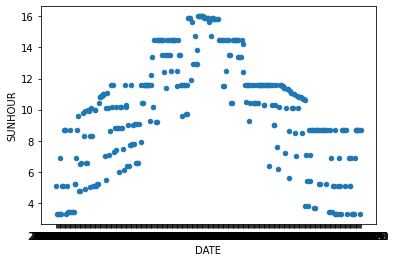

In [115]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis
df2018.plot.scatter("DATE", "SUNHOUR")

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fill_na()` to propagate non-null values forward or backward.

In [116]:
# This task is hard to read, but I guess I have to fill_na() for "SUNHOUR"
df2018["SUNHOUR"].isna().sum()

# Here we go
df2018["SUNHOUR"].fillna(method="bfill", inplace=True)

### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [117]:
# Here we go
df2018["OPINION"].fillna("unknown", inplace=True)


## Now, each axis should have 365 non-null values.

In [118]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

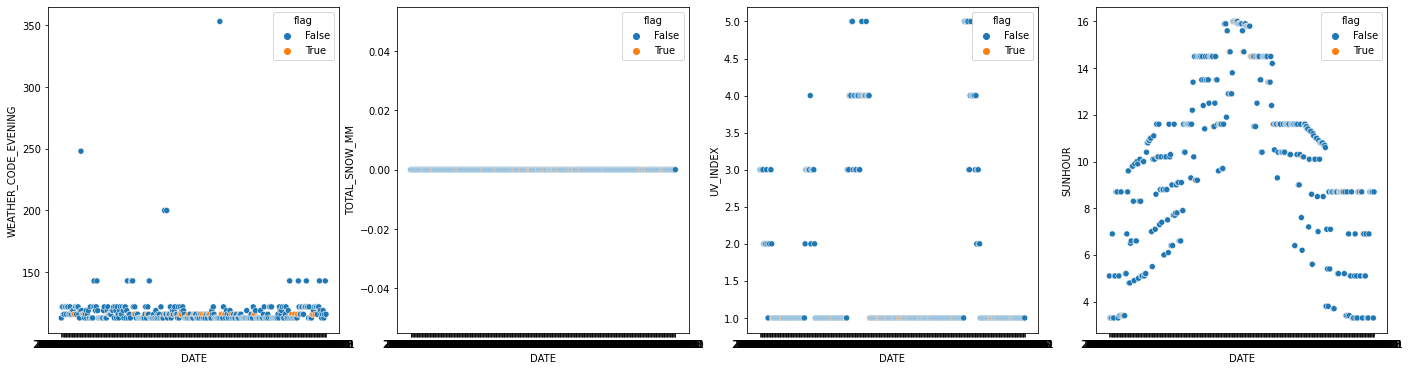

In [119]:
# Oh, I don't know how to seaborn

# FEW HOURS LATER

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new figure and subplots
f, axes = plt.subplots(1, 4, sharex=True, figsize=(24,6))

# Creating scatterplots into subplot axes
sns.scatterplot(ax=axes[0], data=df2018, x="DATE", y="WEATHER_CODE_EVENING", hue="flag")
sns.scatterplot(ax=axes[1], data=df2018, x="DATE", y="TOTAL_SNOW_MM", hue="flag")
sns.scatterplot(ax=axes[2], data=df2018, x="DATE", y="UV_INDEX", hue="flag")
sns.scatterplot(ax=axes[3], data=df2018, x="DATE", y="SUNHOUR", hue="flag")

# DATE axis looks horrible, but I have no time left for this quest now.


  



# Quest - Apply and Concatenate

Check that you have 21 columns and 365 rows, and no missing values:

## Prologue

In [120]:
df2018.info()

# Looks good.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

The _DATE_ feature is in `str` type.

In [121]:
type(df2018["DATE"][0])

str

## Missions of this quest:

  * Create a `translate` function that translates each of the 5 possible values present in `OPINION` into your language (french or german, etc...). Your function must take one `str` as a parameter, and return another `str` with the translation.  
**For example**: `translate("bad")` should return `"mauvais` in french. Same for `very bad`, `not good not bad`, `good` and `very good`.  
You can use a `dict` dictionary, or nested conditions (the dictionary is more elegant).  

Be careful, you have to anticipate the case where the argument provided is not one of the 5 values, and then return the text unchanged. For example: `translate("hello")` should return `"hello"`.


In [179]:
def translate(value):
  d = {
      "very bad": "veľmi zlé",
      "bad": "zlé",
      "not good not bad" : "ani dobré ani zlé",
      "good": "dobré",
      "very good" : "veľmi dobré"
      }
  print(d.get(value, value))
  return d.get(value, value)

  * Apply your function to the OPINION series with apply, check that it works, then store the result in the same OPINION column.

In [180]:
df2018["OPINION"].apply(translate)

zlé
zlé
zlé
zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
zlé
unknown
zlé
zlé
zlé
zlé
zlé
zlé
veľmi zlé
veľmi zlé
zlé
zlé
zlé
zlé
unknown
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
unknown
zlé
ani dobré ani zlé
ani dobré ani zlé
zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
ani dobré ani zlé
veľmi zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
zlé
ani dobré ani zlé
veľmi zlé
ani dobré ani zlé
zlé
zlé
zlé
zlé
unknown
zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
dobré
dobré
dobré
veľmi dobré
veľmi dobré
dobré
ani dobré ani zlé
ani dobré ani zlé
an

0            zlé
1            zlé
2            zlé
3            zlé
4            zlé
         ...    
360    veľmi zlé
361    veľmi zlé
362    veľmi zlé
363    veľmi zlé
364    veľmi zlé
Name: OPINION, Length: 365, dtype: object

In [181]:
# Storing into the DataFrame
df2018["OPINION"] = df2018["OPINION"].apply(translate)

zlé
zlé
zlé
zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
zlé
unknown
zlé
zlé
zlé
zlé
zlé
zlé
veľmi zlé
veľmi zlé
zlé
zlé
zlé
zlé
unknown
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
unknown
zlé
ani dobré ani zlé
ani dobré ani zlé
zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
ani dobré ani zlé
veľmi zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
zlé
ani dobré ani zlé
veľmi zlé
ani dobré ani zlé
zlé
zlé
zlé
zlé
unknown
zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
dobré
dobré
dobré
veľmi dobré
veľmi dobré
dobré
ani dobré ani zlé
ani dobré ani zlé
an

In [182]:
# Checking via df.sample()
df2018.sample(5)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
20,2018-01-21,13,11,32,12,13,12,1.3,94,8.750,1019,99.625,13,12,10,122.0,0.0,1.0,3.4,zlé,False,1,21
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,116.0,0.0,4.0,11.5,unknown,True,5,24
178,2018-06-28,27,18,21,19,27,25,0.0,71,9.000,1018,13.000,28,19,23,113.0,0.0,1.0,15.9,dobré,False,6,28
27,2018-01-28,12,9,14,10,12,11,0.2,98,6.250,1039,97.125,12,11,9,248.0,0.0,1.0,4.8,zlé,False,1,28
294,2018-10-22,18,10,28,11,18,13,0.0,80,10.000,1035,30.500,18,12,15,113.0,0.0,4.0,8.5,ani dobré ani zlé,False,10,22


  * Use `apply` to create a new `MONTH` column which will contain the number of the month (from 1 to 12). You can define a function, or use a lambda function.

In [183]:
# lambda function:
#   - takes argument into str(s)
#   - splits the string ("2018-03-14") into three substrings
#   - returns the second one (month)
#   - makes integer out of the month number

# Then, store it to new column:

df2018["MONTH"] = df2018["DATE"].apply(lambda s: int(s.split(sep="-")[1]))

In [184]:
# Check:
df2018.sample(5)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
86,2018-03-28,12,6,30,11,12,8,5.6,94,9.500,1014,70.375,12,11,8,113.0,0.0,1.0,9.0,zlé,False,3,28
346,2018-12-13,3,2,23,3,3,2,1.4,86,8.875,1014,88.875,3,1,-3,116.0,0.0,1.0,8.7,unknown,True,12,13
176,2018-06-26,27,15,23,17,26,26,0.0,70,10.000,1022,2.375,28,22,22,113.0,0.0,1.0,16.0,veľmi dobré,False,6,26
233,2018-08-22,28,18,13,18,28,25,0.0,65,10.000,1019,12.000,30,18,25,113.0,0.0,1.0,11.6,dobré,False,8,22
68,2018-03-10,15,10,25,11,15,12,0.2,87,9.000,999,58.125,16,12,11,116.0,0.0,3.0,11.6,ani dobré ani zlé,False,3,10


  * Use `apply` to create a new column `DAY` which will contain the number of the day (from 1 to 31). You can define a function, or use a lambda function.

In [185]:
# Same approach as above, the needed substring is on position 2 now

df2018["DAY"] = df2018["DATE"].apply(lambda s: int(s.split(sep="-")[2]))

In [186]:
# Check:

df2018.sample(5)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
169,2018-06-19,22,14,9,16,21,22,0.0,81,7.0,1027,53.625,25,19,21,116.0,0.0,1.0,13.8,ani dobré ani zlé,False,6,19
329,2018-11-26,9,5,13,5,9,6,0.0,94,7.0,1019,46.125,9,6,3,116.0,0.0,1.0,6.9,veľmi zlé,False,11,26
320,2018-11-17,10,5,21,6,10,6,0.0,80,10.0,1021,4.500,10,7,4,113.0,0.0,1.0,8.7,veľmi zlé,False,11,17
277,2018-10-05,24,12,12,12,24,17,0.0,61,10.0,1019,0.625,26,14,20,113.0,0.0,1.0,11.3,dobré,False,10,5
305,2018-11-02,13,5,9,5,13,9,0.0,78,10.0,1029,16.000,14,7,9,113.0,0.0,1.0,8.7,ani dobré ani zlé,False,11,2


  * Concatenate the rows of DataFrame 2018, with those of 2019 (you should have imported it at the top of your notebook).

In [187]:
df_result = pd.concat([df_weather, df2018])

# Reseting index after concatenation
df_result.reset_index(drop=True, inplace=True)

df_result.sample(5)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,flag
223,2019-08-12,22,13,28,14,21,20,2.4,75,9.750,1021,70.250,24,13,17,116.0,176.0,176.0,0.0,4.0,9.2,bad,8,12,NaN
726,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,NaN,NaN,113.0,0.0,1.0,8.7,veľmi zlé,12,28,False
485,2018-05-01,12,3,19,5,12,10,0.0,64,10.000,1016,20.625,13,7,9,NaN,NaN,116.0,0.0,3.0,14.5,veľmi zlé,5,1,False
648,2018-10-11,20,14,29,15,20,15,1.8,71,10.000,1012,35.500,20,14,19,NaN,NaN,113.0,0.0,5.0,10.1,ani dobré ani zlé,10,11,False
207,2019-07-27,23,14,17,15,22,22,2.8,74,7.875,1011,62.125,25,15,18,143.0,176.0,353.0,0.0,1.0,10.4,not good not bad,7,27,NaN


You should obtain a DataFrame with 730 rows (365 * 2) and 25 columns (✔️):

  * 20 common columns ✔️
  * 2 common columns `MONTH` and `DAY` ✔️
  * 1 column `flag` dedicated to 2018 ✔️
  * 2 columns dedicated to 2019: `WEATHER_CODE_MORNING` and `WEATHER_CODE_NOON`. ✔️


In [188]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    730 non-null    object 
 1   MAX_TEMPERATURE_C       730 non-null    int64  
 2   MIN_TEMPERATURE_C       730 non-null    int64  
 3   WINDSPEED_MAX_KMH       730 non-null    int64  
 4   TEMPERATURE_MORNING_C   730 non-null    int64  
 5   TEMPERATURE_NOON_C      730 non-null    int64  
 6   TEMPERATURE_EVENING_C   730 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     730 non-null    float64
 8   HUMIDITY_MAX_PERCENT    730 non-null    int64  
 9   VISIBILITY_AVG_KM       730 non-null    float64
 10  PRESSURE_MAX_MB         730 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  730 non-null    float64
 12  HEATINDEX_MAX_C         730 non-null    int64  
 13  DEWPOINT_MAX_C          730 non-null    int64  
 14  WINDTEMP_MAX_C          730 non-null    in

  * Use apply to create a 26th column `YEAR` which will contain the year number (2018 or 2019). You can define a function, or use a lambda function.

In [189]:
# Same approach as above, the needed substring is on position 0 now

df_result["YEAR"] = df_result["DATE"].apply(lambda s: int(s.split(sep="-")[0]))

In [190]:
# Check

df_result.sample(5)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,flag,YEAR
473,2018-04-19,23,13,12,13,22,20,0.0,76,10.000,1023,0.750,26,18,19,NaN,NaN,113.0,0.0,1.0,11.6,dobré,4,19,False,2018
145,2019-05-26,17,11,15,12,16,16,0.5,87,6.750,1022,78.750,17,14,15,143.0,176.0,176.0,0.0,1.0,9.6,bad,5,26,NaN,2019
355,2019-12-22,10,4,34,10,10,9,3.0,75,8.875,1006,76.375,10,7,6,266.0,116.0,353.0,0.0,1.0,5.1,very bad,12,22,NaN,2019
136,2019-05-17,17,10,16,10,16,15,4.6,77,9.875,1008,55.000,17,12,11,116.0,116.0,353.0,0.0,1.0,11.5,not good not bad,5,17,NaN,2019
110,2019-04-21,21,11,11,11,20,19,7.8,78,9.125,1023,42.375,22,15,15,116.0,116.0,356.0,0.0,1.0,9.3,good,4,21,NaN,2019


## Visualization tasks

Draw the following 4 graphs to compare 2018 and 2019:
  * Histogram of wind speed
  * Boxplots for precipitation
  * Scatterplots for the SUNHOUR and the date
  * Violinplots for maximum temperature

On each graph you will be able to read whether 2018 and 2019 are different or similar, so use color to make them stand out!

### Preparation

In [191]:
# Transforming string "DATE" to datetime (for viz purposes)
df_result["DATE"] = pd.to_datetime(df_result["DATE"])

In [192]:
# Getting basic info
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    730 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       730 non-null    int64         
 2   MIN_TEMPERATURE_C       730 non-null    int64         
 3   WINDSPEED_MAX_KMH       730 non-null    int64         
 4   TEMPERATURE_MORNING_C   730 non-null    int64         
 5   TEMPERATURE_NOON_C      730 non-null    int64         
 6   TEMPERATURE_EVENING_C   730 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     730 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    730 non-null    int64         
 9   VISIBILITY_AVG_KM       730 non-null    float64       
 10  PRESSURE_MAX_MB         730 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  730 non-null    float64       
 12  HEATINDEX_MAX_C         730 non-null    int64     

### Histogram of wind speed


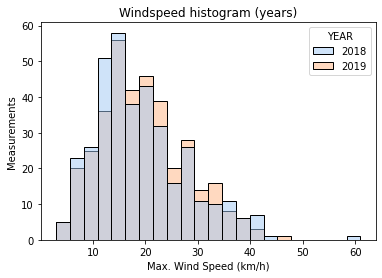

In [200]:
ax = sns.histplot(
    data=df_result,
    x="WINDSPEED_MAX_KMH",
    hue="YEAR",
    palette="pastel"
)

ax.set_title("Windspeed histogram (years)")
ax.yaxis.set_label_text("Measurements")
ax.xaxis.set_label_text("Max. Wind Speed (km/h)")

plt.show()

### Boxplots for precipitation

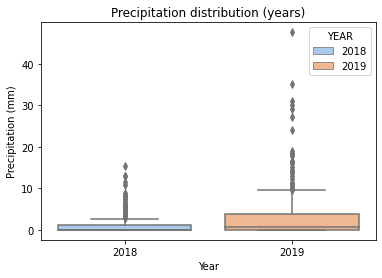

In [201]:
ax = sns.boxplot(
    x="YEAR",
    y="PRECIP_TOTAL_DAY_MM",
    hue="YEAR",
    dodge=False,
    palette="pastel",
    data=df_result
)

ax.set_title("Precipitation distribution (years)")
ax.yaxis.set_label_text("Precipitation (mm)")
ax.xaxis.set_label_text("Year")

plt.show()

### Scatterplots for the SUNHOUR and the date

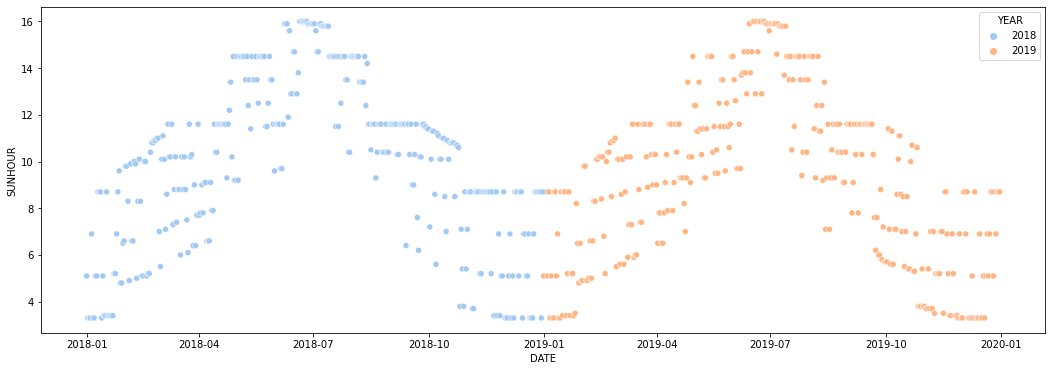

In [206]:


ax = sns.scatterplot(
    data=df_result,
    x="DATE",
    y="SUNHOUR",
    hue="YEAR",
    palette="pastel"
)

ax.figure.set_size_inches(18,6)
ax.y

plt.show()

### Violinplots for maximum temperature

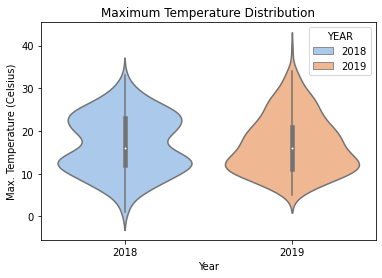

In [209]:
ax = sns.violinplot(
    x="YEAR",
    y="MAX_TEMPERATURE_C",
    hue="YEAR",
    palette="pastel",
    dodge=False,
    data=df_result
)

ax.set_title("Maximum Temperature Distribution")
ax.yaxis.set_label_text("Max. Temperature (Celsius)")
ax.xaxis.set_label_text("Year")

plt.show()

# Business Analysis

After the technical analysis, it's time for the business interpretation. Which year do you think had the best weather? 2018 or 2019? On what criteria do you base your opinion?

In [213]:
# Translating the rest of the dataframe to Slovak
# I want to create a histogram that proves that weather was better in 2018
df_result["OPINION"] = df_result["OPINION"].apply(translate)

veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
veľmi zlé
veľmi zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
dobré
ani dobré ani zlé
ani dobré ani zlé
dobré
dobré
zlé
ani dobré ani zlé
ani dobré ani zlé
zlé
zlé
ani dobré ani zlé
veľmi zlé
zlé
veľmi zlé
zlé
zlé
veľmi zlé
veľmi zlé
zlé
zlé
zlé
zlé
veľmi zlé
veľmi zlé
veľmi zlé
ani dobré ani zlé
ani dobré ani zlé
dobré
ani dobré ani zlé
ani dobré ani zlé
veľmi zlé
veľmi zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
ani dobré ani zlé
dobré
dobré
zlé
veľmi zlé
veľmi zlé
veľmi zlé
veľmi zlé
zlé
veľmi zlé
ani dobré ani zlé
ani 

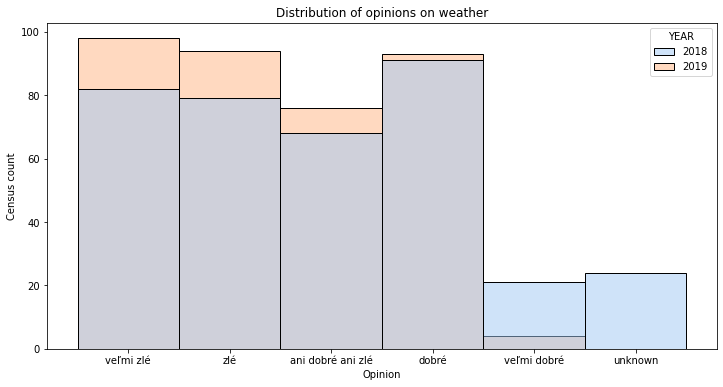

In [221]:
# Charting a histogram that shows opinion census on 2018 and 2019 weather.

ax = sns.histplot(
    x="OPINION",
    hue="YEAR",
    palette="pastel",
    data=df_result
)

ax.figure.set_size_inches(12,6)
ax.set_title("Distribution of opinions on weather")
ax.yaxis.set_label_text("Census count")
ax.xaxis.set_label_text("Opinion")

plt.show()

In [223]:
df_result["OPINION"][df_result["OPINION"]=="unknown"].count()

24

In [230]:
df_result.loc[df_result["OPINION"].isin(["veľmi zlé", "zlé"]), ["OPINION"]] = "rather bad"

In [232]:
df_result.loc[df_result["OPINION"].isin(["veľmi dobré", "dobré"]), ["OPINION"]] = "rather good"

In [233]:
df_result.loc[df_result["OPINION"].isin(["ani dobré ani zlé"]), ["OPINION"]] = "neutral"

In [237]:
df_result["OPINION"].value_counts()

rather bad     353
rather good    209
neutral        144
unknown         24
Name: OPINION, dtype: int64

In [253]:
df_result.pivot_table(index="OPINION", values="DAY", columns="YEAR", aggfunc="count")

YEAR,2018,2019
OPINION,,
neutral,68.0,76.0
rather bad,161.0,192.0
rather good,112.0,97.0
unknown,24.0,NaN


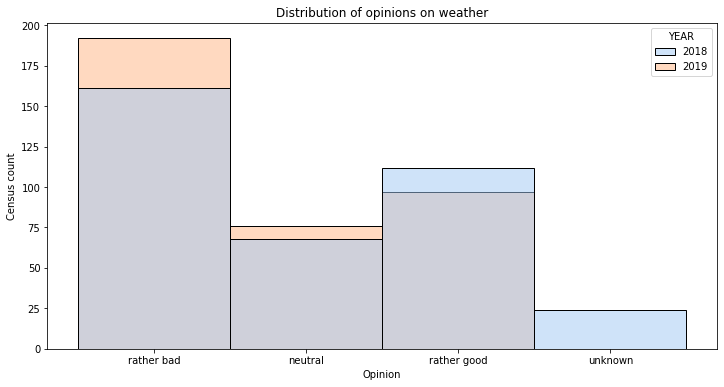

In [235]:
# Charting a histogram that shows opinion census on 2018 and 2019 weather.

ax = sns.histplot(
    x="OPINION",
    hue="YEAR",
    palette="pastel",
    data=df_result
)

ax.figure.set_size_inches(12,6)
ax.set_title("Distribution of opinions on weather")
ax.yaxis.set_label_text("Census count")
ax.xaxis.set_label_text("Opinion")

plt.show()

From this plot we can take following insights:
  * 2018 saw lower number of "rather bad" weather (delta = 31)
  * 2018 saw slightly higher number of "rather good" weather (delta = 15)
  * some 2018 measurements are "unknown" (24)
  * count of "unknown" measurements is lower than difference between 2019 and 2018 "rather bad" weather, so in case this missing data would account for "rather bad" weather, it still wouldn't meet the 2019 counts

From these insights we can determine the weather was considered **better in 2018**.